Random Forest Algorithm with Python and Scikit-Learn
-------------------------------------------------------------------------------

__Random forest is a type of supervised machine learning algorithm based on ensemble learning. Ensemble learning is a type of learning where you join different types of algorithms or same algorithm multiple times to form a more powerful prediction model. The random forest algorithm combines multiple algorithm of the same type i.e. multiple decision trees, resulting in a forest of trees, hence the name "Random Forest". The random forest algorithm can be used for both regression and classification tasks.__

How the Random Forest Algorithm Works
------------------------------------------------------------

The following are the basic steps involved in performing the random forest algorithm:

>1 Pick N random records from the dataset.

>2 Build a decision tree based on these N records.

>3 Choose the number of trees you want in your algorithm 
   and repeat steps 1 and 2.
   
>4 In case of a regression problem, for a new record, each tree in the forest predicts a value for Y (output). The final value can be calculated by taking the average of all the values predicted by all the trees in forest. 

>Or, in case of a classification problem, each tree in the forest predicts the category to which the new record belongs. Finally, the new record is assigned to the category that wins the majority vote.

Advantages of using Random Forest
-----------------------------------------------------
As with any algorithm, there are advantages and disadvantages to using it. In the next two sections we'll take a look at the pros and cons of using random forest for classification and regression.

1> The random forest algorithm is not biased, since, there are multiple trees and each tree is trained on a subset of data. Basically, the random forest algorithm relies on the power of "the crowd"; therefore the overall biasedness of the algorithm is reduced.

2> This algorithm is very stable. Even if a new data point is introduced in the dataset the overall algorithm is not affected much since new data may impact one tree, but it is very hard for it to impact all the trees.

3> The random forest algorithm works well when you have both categorical and numerical features. 

4> The random forest algorithm also works well when data has missing values or it has not been scaled well.

Disadvantages of using Random Forest
---------------------------------------------------------
1> A major disadvantage of random forests lies in their complexity. They required much more computational resources, owing to the large number of decision trees joined together.

2> Due to their complexity, they require much more time to train; than other comparable algorithms.

1> Using Random Forest for Regression
----------------------------------------------------------

Problem Definition : The problem here is to predict the gas consumption (in millions of gallons) in 48 of the US states based on petrol tax (in cents), per capita income (dollars), paved highways (in miles) and the proportion of population with the driving license.

In [2]:
# Import Libraries
import pandas as pd  
import numpy as np  

dataset = pd.read_csv('./datasets_n_images/datasets_n_images/datasets_module_4/petrol_consumption.csv')  
# your code goes here1
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [3]:
# your code goes here2
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [8]:
# Preparing the Data
# divide the data into attributes and labels

X = dataset.drop('Petrol_Consumption', axis=1)  
y = dataset['Petrol_Consumption']  

# dividing data into training and testing set .. type your code here

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=0) 
                                    #default tset_size=0.25,
                                    #random_state=seedvalue


# Training and Making Predictions
# your code goes here3
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=20, random_state=0)

regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)


# The RandomForestRegressor class of the sklearn.ensemble library
# is used to solve regression problems via random forest. 
# The most important parameter of the RandomForestRegressor class 
# is the n_estimators parameter. 
# This parameter defines the number of trees in the random forest.

# Evaluating the Algorithm
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 49.97291666666667
Mean Squared Error: 3873.2832291666673
Root Mean Squared Error: 62.235707027129266


With 20 trees, the root mean squared error is 62.23 which is greater than 10 percent of the average petrol consumption i.e. 576.77. This may indicate, among other things, that we have not used enough estimators (trees).

In [9]:
# If the number of estimators is changed to 50, the results are as follows:
regressor = RandomForestRegressor(n_estimators=50, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test)  

# Evaluating the Algorithm
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 48.13999999999999
Mean Squared Error: 3392.6936999999984
Root Mean Squared Error: 58.246834248738345


With 50 trees, the root mean squared error is 58.24 which is close to 10 percent of the average petrol consumption i.e. 576.77.  (~ these values may change depending upon the train-test data set).

2: Using Random Forest for Classification
------------------------------------------------------------

Problem Definition : The task here is to predict whether a bank currency note is authentic or not based on four attributes i.e. variance of the image wavelet transformed image, skewness, entropy, and curtosis of the image.

In [13]:
# doing the minimum necessary imports
# more modules would be imported as and when needed

import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

# reading data from CSV file. 
# reading bank currency note data into pandas dataframe.
bankdata = pd.read_csv("./datasets_n_images/datasets_n_images/datasets_module_4/bill_authentication.csv")  

# Exploratory Data Analysis
print(bankdata.shape)  
print("------------")
print(bankdata.head()) 

(1372, 5)
------------
   Variance  Skewness  Curtosis  Entropy  Class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


In [26]:
# Data Preprocessing
# Data preprocessing involves 
# (1) Dividing the data into attributes and labels and 
# (2) dividing the data into training and testing sets.

# To divide the data into attributes and labels -- type your code
X=bankdata.drop('Class',axis=1)
y=bankdata['Class']


# the final preprocessing step is to divide data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)



# Training the Algorithm.
# your code goes here6

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=30, random_state=0)

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)


# Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

[[152   1]
 [  1 121]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       153
           1       0.99      0.99      0.99       122

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

0.9927272727272727


The accuracy achieved for by our random forest classifier with 20 trees is 100%. 


The learner / Student is expected to try n_estimators values of 10 and 50. 
Do you observe any difference ?
We find that n_estimators=20 gives best gradient descent point.
Also, pl note that we can get multiple gradient descent points at regular intervals too may be 20,40,60,...


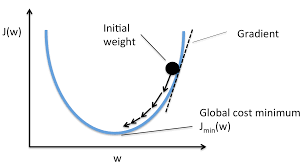



<img src= "https://qph.fs.quoracdn.net/main-qimg-a820f5e19a9393391572a73868f8ca1a" width=400 height=300>


__Note:
We will never get 100 percent. Ideal results in realtime datasets is between 85 to 97.__